<a href="https://colab.research.google.com/github/LOKESH-1213/Customer-Churns-LOKESH/blob/main/Phase_3_Customer_Churns_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

# 1. Load External Dataset (CSV File)
data = pd.read_csv('telecom_churn_data.csv')
data.head()

Saving telecom_churn_data.csv to telecom_churn_data.csv


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None

Missing Values:
mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64
Do you want to view churn distribution? (1 for Yes, 0 for No): 1


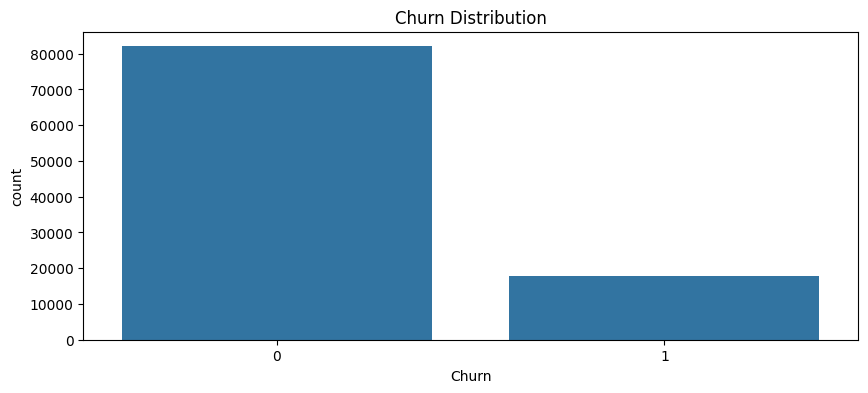

In [ ]:
# Basic Info
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
# Create 'Churn' column manually based on recharge amount in month 9
data['Churn'] = data['total_rech_amt_9'].apply(lambda x: 1 if x == 0 else 0)

# Ask user if they want to view churn type distribution
if input("Do you want to view churn distribution? (1 for Yes, 0 for No): ").strip() == '1':
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x='Churn')
    plt.title("Churn Distribution")
    plt.show()

In [ ]:
# 3. Churn Analysis Function Placeholder (Dataset has no Product info)
def churn_analysis():
    churn_rate = data['Churn'].value_counts(normalize=True) * 100
    print(f"\nChurn Rate (based on no recharge in month 9):")
    print(churn_rate)
    numeric_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']
    print("\nAverage Recharge Amounts:")
    print(data[numeric_cols].mean())

    if input("Do you want to visualize recharge patterns? (1 for Yes, 0 for No): ").strip() == '1':
        data[numeric_cols].plot(kind='box', figsize=(10, 6))
        plt.title("Recharge Amounts Over Months")
        plt.show()

In [ ]:
# 4. Data Preprocessing for Model Building
features = data.drop(columns=['mobile_number', 'Churn'])
target = data['Churn']

# Remove non-numeric columns
features = features.select_dtypes(include=[np.number])

# Fill NA with 0 for recharge values (if any)
features.fillna(0, inplace=True)

# Label encode target
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Model Building - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\nModel Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))



Model Evaluation:
[[16390     0]
 [    0  3610]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16390
           1       1.00      1.00      1.00      3610

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



Do you want to see feature importance plot? (1 for Yes, 0 for No): 1


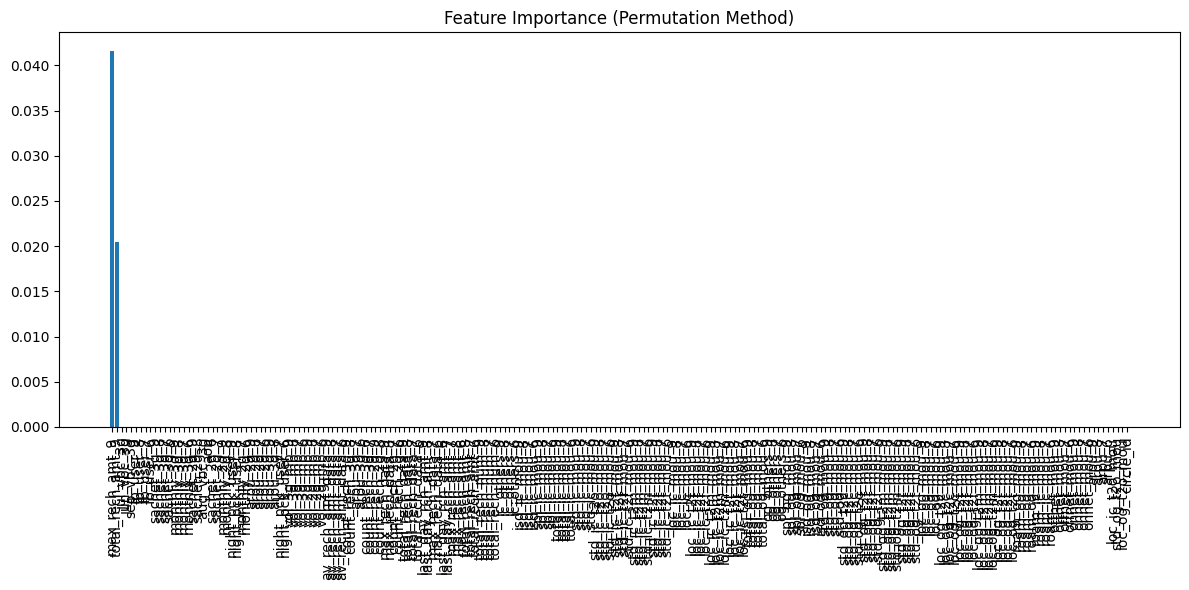

In [ ]:
# 6. Churn Pattern Discovery using Permutation Importance
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean
feature_names = X_train.columns

if input("Do you want to see feature importance plot? (1 for Yes, 0 for No): ").strip() == '1':
    sorted_idx = importances.argsort()[::-1]
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importances)), importances[sorted_idx], align="center")
    plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
    plt.title("Feature Importance (Permutation Method)")
    plt.tight_layout()
    plt.show()


Options:
1. Analyze churn
2. Predict churn for a customer
3. Exit
Select an option (1/2/3): 2

Predicted churn (0 = No churn, 1 = Churn): 0


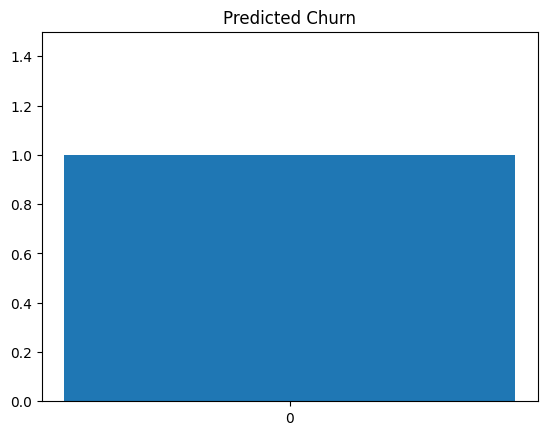


Options:
1. Analyze churn
2. Predict churn for a customer
3. Exit
Select an option (1/2/3): 1

Churn Rate (based on no recharge in month 9):
Churn
0    82.04382
1    17.95618
Name: proportion, dtype: float64

Average Recharge Amounts:
total_rech_amt_6    327.514615
total_rech_amt_7    322.962970
total_rech_amt_8    324.157122
total_rech_amt_9    303.345673
dtype: float64
Do you want to visualize recharge patterns? (1 for Yes, 0 for No): 1


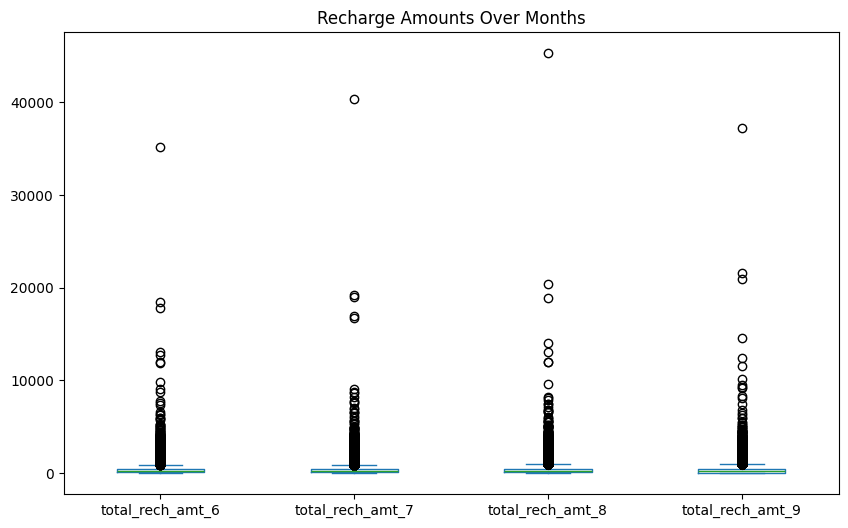


Options:
1. Analyze churn
2. Predict churn for a customer
3. Exit
Select an option (1/2/3): 3
Exiting...


In [ ]:
# 7. Customer Prediction Interface (data passed externally to avoid prompting inside function)
def predict_churn_from_input(input_data, show_plot=False):
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    churn_label = le.inverse_transform(prediction)
    print(f"\nPredicted churn (0 = No churn, 1 = Churn): {churn_label[0]}")

    if show_plot:
        plt.bar(['Prediction'], [1], tick_label=[churn_label[0]])
        plt.title("Predicted Churn")
        plt.ylim(0, 1.5)
        plt.show()

# Prompt user for action
while True:
    print("\nOptions:")
    print("1. Analyze churn")
    print("2. Predict churn for a customer")
    print("3. Exit")
    choice = input("Select an option (1/2/3): ")
    if choice == '1':
        churn_analysis()
    elif choice == '2':
        test_input_data = dict(zip(X_train.columns, X_train.iloc[0]))
        predict_churn_from_input(test_input_data, show_plot=True)
    elif choice == '3':
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")